In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import torchmetrics
import matplotlib.pyplot as plt

In [2]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df, target):
        self.data = torch.tensor(df.values, dtype=torch.float32)
        self.target = torch.tensor(target.values, dtype=torch.float32)

    def __len__(self):
        # here i will return the number of samples in the dataset
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]


In [3]:
device = 'mps'
learning_rate = 0.00001
batch_size = 100
experiment_name = 'lucas_01'

In [4]:
df_train = pd.read_csv('data/lucas_dataset/lucas_dataset_train.csv')
df_val = pd.read_csv('data/lucas_dataset/lucas_dataset_val.csv')

In [5]:
print(df_train.shape)
df_train

(13939, 4216)


,Unnamed: 0,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,spc.403,spc.403.5,spc.404,...,sand,pH.in.CaCl2,pH.in.H2O,OC,CaCO3,N,P,K,CEC,set
0,5671,0.669077,0.676745,0.684369,0.691928,0.699396,0.706758,0.713992,0.721079,0.728002,...,75,4.78,5.15,8.2,0,0.9,39.6,54.6,2.8,2
1,9008,0.679681,0.687950,0.696161,0.704279,0.712283,0.720136,0.727818,0.735309,0.742584,...,41,4.33,4.84,44.1,0,2.5,54.2,261.8,13.8,1
2,9941,0.786848,0.795459,0.804018,0.812496,0.820865,0.829104,0.837181,0.845079,0.852777,...,48,6.08,6.67,22.6,0,2.3,29.1,216.5,12.8,1
3,345,0.583825,0.592186,0.600491,0.608715,0.616834,0.624822,0.632655,0.640310,0.647767,...,35,4.67,5.58,21.0,0,1.5,0.0,69.8,4.7,1
4,4307,0.791126,0.799194,0.807208,0.815131,0.822943,0.830612,0.838116,0.845435,0.852549,...,50,6.77,7.04,38.8,6,3.0,12.1,54.3,20.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13934,8155,0.642357,0.650594,0.658771,0.666853,0.674813,0.682620,0.690251,0.697683,0.704898,...,86,3.72,4.66,10.3,0,0.3,15.5,21.0,3.0,3
13935,1636,0.922261,0.934263,0.946202,0.958037,0.969738,0.981275,0.992614,1.003729,1.014598,...,22,7.01,7.69,11.3,2,1.0,0.0,458.5,22.6,3
13936,5012,0.705685,0.712331,0.718935,0.725476,0.731939,0.738299,0.744541,0.750645,0.756600,...,89,3.09,3.95,9.3,0,0.4,0.0,20.3,4.7,1
13937,3820,0.821155,0.831790,0.842372,0.852866,0.863251,0.873497,0.883579,0.893470,0.903146,...,53,7.02,7.68,6.2,1,0.7,0.0,466.0,17.1,1


### Get X and y of train and val

In [6]:
# Logical array of columns
input_cols = df_train.columns.str.contains('spc') | df_train.columns.str.contains('GPS')

X_train = df_train[df_train.columns[input_cols]]
y_train = df_train[df_train.columns[~input_cols]]
X_val = df_val[df_val.columns[input_cols]]
y_val = df_val[df_val.columns[~input_cols]]

### Load train and validation dataset

In [7]:
train_ds = Dataset(X_train, y_train)
val_ds = Dataset(X_val, y_val)

nr_features = len(train_ds)
nr_features

13939

In [12]:
# get first item
inp, out = val_ds.__getitem__(10)
# print shapes
print(inp.shape)
print(out.shape)

torch.Size([4202])
torch.Size([14])


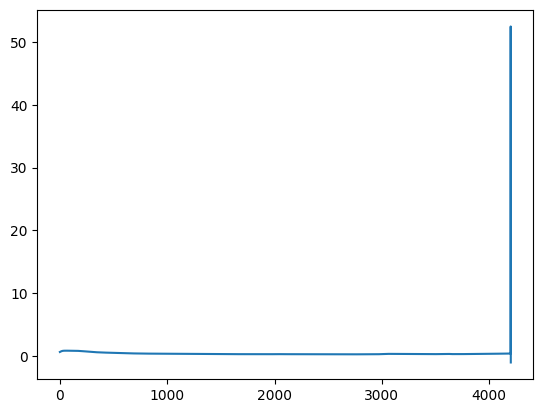

In [13]:
# plot it
plt.plot(inp)
plt.show()

### Create train and validation dataloader

In [10]:
# create train dataloader
train_dl = torch.utils.data.DataLoader(
    train_ds,
    batch_size = batch_size,
    drop_last = True,
    shuffle = True,
    num_workers = 8
)
# create validation dataloader
val_dl = torch.utils.data.DataLoader(
    val_ds,
    batch_size = batch_size,
    drop_last = False,
    shuffle = False,
    num_workers = 8
)

### Define network

In [11]:
class Net(nn.Module):

    def __init__(self):
        # init superclass
        super(Net, self).__init__()

        self.conv1 == nn.Conv1D(in_channels=1, out_channels=16, kernel_size=3, stride=2)
        self.conv2 == nn.Conv1D(in_channels=16, out_channels=32, kernel_size=3, stride=2)
        self.conv3 == nn.Conv1D(in_channels=64, out_channels=128, kernel_size=3, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x